## Ejercicio 1 – EDA (Exploratory Data Analysis) Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### 1. Carga todos los csv en un único dataframe ¿Cuántas filas totales obtienes?

In [2]:
def parseCsvToDataFramewithPattern(anios):
    # Creamos una lista la cual va a almacenar los registros de cada año correspondiente
    accidentRecordData = []
    # Debido al patron de los registros, hacemos uso de un bucle en el cual se usa un template String acorde a los registros obtenidos
    for anio in anios:
        accidentRecordDataForYears = pd.read_csv(f"./csv/{anio}_Accidentalidad.csv", sep=";")
        accidentRecordData.append(accidentRecordDataForYears)
    accidentRecord = pd.concat(accidentRecordData, ignore_index=True)
    numberOfRows = len(accidentRecord)
    print(f"Numero de registros: {numberOfRows}")
    return accidentRecord

### 2. No vamos a emplear variables que estén referidas a coordenadas, borra todas aquellas columnas que estén referidas a coordenadas.

In [3]:
def removeCoordinateColumns(accidentRecord):
    print(f"Nombres de las columnas antes:\n  {accidentRecord.columns}\n")
    accidentRecordWithoutCoordinates = accidentRecord.drop(['coordenada_x_utm','coordenada_y_utm'], axis=1)    
    print(f"Nombres de las columnas despues:\n {accidentRecordWithoutCoordinates.columns}")
    return accidentRecordWithoutCoordinates

### 3. Si observamos la columna que contiene el tipo del vehículo, encontramos mucha información redundante. Vamos a reestructurar esta columna para tener solamente las siguientes categorías:

   1. Turismo
   2. Motocicleta
   3. Furgoneta
   4. Bicicleta
   5. Camión
   6. Autobús
   7. Otro vehículo.

In [4]:
def categoryRestructuring(restructuringOfTheAccidentRecord):
    beforeCategoryRestructuring = restructuringOfTheAccidentRecord['tipo_vehiculo'].value_counts()    
    print(f"Numero de accidentes en funcion del tipo de vehiculo antes de la reestruccturación:\n {beforeCategoryRestructuring}\n")
    restructuringOfTheAccidentRecord['tipo_vehiculo'].replace({
        'Motocicleta > 125cc' : 'Motocicleta',
        'Turismo' : 'Turismo',
        'Furgoneta' : 'Furgoneta',
        'Autobús' : 'Autobus',
        'Ciclomotor' : 'Motocicleta',
        'Motocicleta hasta 125cc' : 'Motocicleta',
        'Todo terreno' : 'Turismo',
        'Bicicleta' : 'Bicicleta',
        'Camión rígido' : 'Camion',
        'Maquinaria de obras' : 'Otro vehiculo',
        'Tractocamión' : 'Otro vehiculo',
        'Cuadriciclo no ligero' : 'Turismo',
        'Vehículo articulado' : 'Turismo',
        'Autobús articulado' : 'Autobus',
        'Otros vehículos con motor' : 'Turismo',
        'Autocaravana' : 'Otro vehiculo',
        'Patinete'  : 'Otro vehiculo',
        'Ciclo' : 'Bicicleta',
        'Cuadriciclo ligero' : 'Turismo', 
        'VMU eléctrico' : 'Otro vehiculo',
        'Semiremolque' : 'Camion',
        'Microbús <= 17 plazas': 'Autobus',
        'Sin especificar' : 'Otro vehiculo',
        'Autobus EMT' : 'Autobus',
        'Remolque' : 'Otro vehiculo',
        'Tranvía' : 'Otro vehiculo',
        'Caravana' : 'Otro vehiculo', 
        'Camión de bomberos' : 'Otro vehiculo',
        'Otros vehículos sin motor' : 'Otro vehiculo', 
        'Bicicleta EPAC (pedaleo asistido)' : 'Bicicleta',
        'Moto de tres ruedas > 125cc' : 'Motocicleta',
        'Tren/metro' : 'Otro vehiculo', 
        'Ambulancia SAMUR' : 'Otro vehiculo',
        'Moto de tres ruedas hasta 125cc' : 'Motocicleta',
        'Ciclomotor de dos ruedas L1e-B' : 'Motocicleta',
        'Maquinaria agrícola' : 'Otro vehiculo', 
        'Autobús articulado EMT' : 'Autobus',
        'Ciclomotor de tres ruedas' : 'Motocicleta',
        'Ciclo de motor L1e-A' : 'Motocicleta',
        'Patinete no eléctrico' : 'Otro vehiculo'
    }, inplace=True)
    afterCategoryRestructuring = restructuringOfTheAccidentRecord['tipo_vehiculo'].value_counts()   
    print(f"Numero de accidentes en funcion del tipo de vehiculo despues de la reestruccturación:\n {afterCategoryRestructuring}")
    return restructuringOfTheAccidentRecord

In [5]:
def saveCSV(restructuringOfTheAccidentRecord):
    restructuringOfTheAccidentRecord.to_csv('csv/2019_2023_Accidentalidad.csv', index=False, sep=';')

### 4. Vamos a analizar valores nulos, inspecciona los valores nulos de todas las columnas:

1. Revisa si hay columnas que son íntegramentevalores nulos, si esto ocurre, borra esas columnas
2. Para la columna positivo droga, rellena losnulos con 0.
3. Para la columna positivo alcohol, rellena losnulos con “N”
4. Para las columnas referidas a lesividad,rellenaremos los datos faltantes con “Sin atención sanitaria” (en códigolesividad, pondremos valor 0)
5. Para el estado meteorológico emplearemos lacategoría ya existente “Se desconoce”
6. El resto de valores nulos, los eliminaremos delconjunto de datos.
7. ¿Cuántas filas y columnas tienes ahora?

In [6]:
def parseCsvToDataFrame(nameOfCSV):
    accidentRecord_2019_2023 = pd.read_csv(f"./csv/{nameOfCSV}.csv", sep=";")
    checkingTheNumberOfRows_2019_2023 = len(accidentRecord_2019_2023)        
    print(f"Numero de registros de accidentes de 2019 a 2023: {checkingTheNumberOfRows_2019_2023}\n")
    return accidentRecord_2019_2023

In [7]:

def nullCheck(accidentRecord_2019_2023):
    accidentRecord_2019_2023.dropna(axis=1, how="all", inplace=True)
    accidentRecord_2019_2023['positiva_droga'].fillna(0, inplace=True)
    accidentRecord_2019_2023['positiva_alcohol'].fillna('N', inplace=True)
    accidentRecord_2019_2023['lesividad'].fillna('Sin atención sanitaria', inplace=True)
    accidentRecord_2019_2023['cod_lesividad'].fillna(0, inplace=True)
    accidentRecord_2019_2023['estado_meteorológico'].fillna('Se desconoce', inplace=True)
    accidentRecord_2019_2023.dropna(inplace=True)
    numberOfRows_2019_2023, numberOfCols_2019_2023 = accidentRecord_2019_2023.shape    
    print(f"Tras la comprobacion de nulos nos quedamos con {numberOfRows_2019_2023} filas y {numberOfCols_2019_2023} columnas")
    return accidentRecord_2019_2023

### 5. Vamos a seguir reduciendo el número de categorías de las columnas categóricas, en este caso, vamos a generar una nueva categoría llamada “Otro accidente” para todas aquellas categorías que tengan un porcentaje inferior al 10% en lacolumna tipo accidente.

In [8]:
def restructuringByPercentage(accidentRecord_2019_2023):
    porcentaje = (pd.crosstab(index=accidentRecord_2019_2023['tipo_accidente'], columns="count"))/len(accidentRecord_2019_2023) * 100 < 10
    accidentRecord_2019_2023.replace(porcentaje[porcentaje['count']].index, "Otros accidentes", inplace=True)
    accidentTypeCategories = accidentRecord_2019_2023['tipo_accidente'].unique()    
    print(f"Estas son las categorias que se quedan en tipo_accudente\n {accidentTypeCategories}")
    return accidentRecord_2019_2023

### 6. Dentro de la gravedad de un accidente de tráfico como estamos comprobando hay conductores que dieron positivo por alcohol y, otros positivos por consumo de droga, pero ¿Hay algún accidente en donde los implicados dieran positivo en la prueba de alcohol y también en la prueba de drogas? Muestra el número de implicados, así como el número de expedientes diferentes.

In [9]:
def positiveForDrugsAndAlcohol(accidentRecord_2019_2023):
    positiveResults = accidentRecord_2019_2023[(accidentRecord_2019_2023['positiva_alcohol'] == 'S') & (accidentRecord_2019_2023['positiva_droga'] == 1)]
    numberOfPeopleInvolved = positiveResults.groupby('num_expediente').size().sum()
    numberOfDifferentFiles = positiveResults['num_expediente'].nunique()    
    print(f"El numero de implicados en accidentes donde habia positivo en drogas y en alcohol son {numberOfPeopleInvolved}\n")
    print(f"El numero de expedientes en accidentes donde habia positivo en drogas y en alcohol son {numberOfDifferentFiles}")



### 7. ¿Cuál es el tipo de accidente más común para aquellos implicados que habían dado positivo en alcohol? ¿y para aquellos implicados que no dieron positivo en la prueba de alcohol? ¿Qué diferencias observas?

In [10]:
def differentiationBetweenPositiveAndNegative(accidentRecord_2019_2023):
    positiveInAlcohol = accidentRecord_2019_2023[(accidentRecord_2019_2023['positiva_alcohol'] == 'S')]
    negativeInAlcohol = accidentRecord_2019_2023[(accidentRecord_2019_2023['positiva_alcohol'] == 'N')]

    positiveAccidentType = positiveInAlcohol.groupby('tipo_accidente').size().idxmax()
    negativeAccidentType = negativeInAlcohol.groupby('tipo_accidente').size().idxmax()
    numberOfPositiveAccidents = positiveInAlcohol.groupby('tipo_accidente').size().max()
    numberOfNegativeAccidents = negativeInAlcohol.groupby('tipo_accidente').size().max()    
    
    print(f"El accidente con alcohol positivo mas frecuente es '{positiveAccidentType}' con '{numberOfPositiveAccidents}' accidentes")
    print(f"El accidente con alcohol positivo mas frecuente es '{negativeAccidentType}' con '{numberOfNegativeAccidents}' accidentes")

    return positiveAccidentType, negativeAccidentType, numberOfPositiveAccidents, numberOfNegativeAccidents

### 8. Para cada tipo de vehículo muestra visualmente el número de accidentes en funcióndel estado meteorológico. 

In [11]:
def visualizationOfAccidentsByVehicleAndWeather(accidentRecord_2019_2023):
    graph = accidentRecord_2019_2023.groupby([ 'tipo_vehiculo','estado_meteorológico']).size()
    graph.plot(kind="barh", figsize=(15,15), xlabel="Numero de accidentes", ylabel="Tipo de vehiculo por condicion meteorologica")
    plt.show()  

### 9. Agrupa el dataframe por el número de expediente, vamos a analizar si hay accidentes múltiples. De la agrupación anterior obtén todos aquellos números de expediente que tengan involucrados mayor o igual que 5 tipos distintos de vehículos.

1. ¿Cuántos números de expediente aparecen?
2. ¿Qué cantidad de implicados hay en cadaexpediente?
3. ¿Qué tipos de vehículos diferentes aparecen encada número de expediente?

In [12]:
def groupingByFileNumber(accidentRecord_2019_2023):
    accidentsBasedOnFileNumber = accidentRecord_2019_2023.groupby(['tipo_vehiculo','num_expediente']).size().reset_index(name='implications')
    implications = accidentsBasedOnFileNumber[accidentsBasedOnFileNumber['implications'] >= 5]
    sigleFilesGreaterThanFive = implications['num_expediente'].nunique()
    print(f"Hay {sigleFilesGreaterThanFive} numeros de expediente.")
    for num_files in implications['num_expediente']:
        print(f"Nº de expediente {num_files}:")
        implicationByFile = accidentsBasedOnFileNumber[accidentsBasedOnFileNumber['num_expediente'] == num_files]['implications'].sum()
        involvementPerVehicle = accidentsBasedOnFileNumber[accidentsBasedOnFileNumber['num_expediente'] == num_files]['tipo_vehiculo'].values
        # https://www.freecodecamp.org/espanol/news/metodos-de-cadenas-split-y-join-en-python/
        vehicleParsing = ", ".join(involvementPerVehicle)
        print(f"\t - Ha sido implicado {implicationByFile} veces")
        print(f"\t - Vehiculos implicados: {vehicleParsing}")

### 10. Toma la columna hora y, quédate solamente la hora, es decir de 9:10:00 solo obtener 09, tras ello, muestra gráficamente cuáles son las horas más peligrosas para circular en Madrid 

In [13]:
def dangerousHour(accidentRecord_2019_2023):
    accidentRecord_2019_2023['hora'] = pd.to_datetime(accidentRecord_2019_2023['hora'])
    accidentRecord_2019_2023 = accidentRecord_2019_2023.sort_values(by='hora')
    parseOfHours = accidentRecord_2019_2023['hora'].dt.hour
    accidentsPerHour = accidentRecord_2019_2023.groupby(parseOfHours)['num_expediente'].size().reset_index(name='Numero_accidentes_por_hora')
    graphInformation = go.Scatter(x = accidentsPerHour['hora'], y = accidentsPerHour['Numero_accidentes_por_hora'], mode='lines+markers')
    layout = go.Layout(title="Media de horas con mayor tasa de accidentes", xaxis= dict(title = "Horas"), yaxis= dict(title = "Numero de accidentes"))
    fig = go.Figure(data=[graphInformation], layout=layout)
    fig.show()


[--------------------[Apartado 1]--------------------]



Numero de registros: 212863

[--------------------[Apartado 2]--------------------]

Nombres de las columnas antes:
  Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'coordenada_x_utm', 'coordenada_y_utm', 'positiva_alcohol',
       'positiva_droga', 'Unnamed: 19', 'Unnamed: 20'],
      dtype='object')

Nombres de las columnas despues:
 Index(['num_expediente', 'fecha', 'hora', 'localizacion', 'numero',
       'cod_distrito', 'distrito', 'tipo_accidente', 'estado_meteorológico',
       'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'cod_lesividad',
       'lesividad', 'positiva_alcohol', 'positiva_droga', 'Unnamed: 19',
       'Unnamed: 20'],
      dtype='object')

[--------------------[Apartado 3]--------------------]

Numero de accidentes en funcion del tipo de vehiculo antes de la r

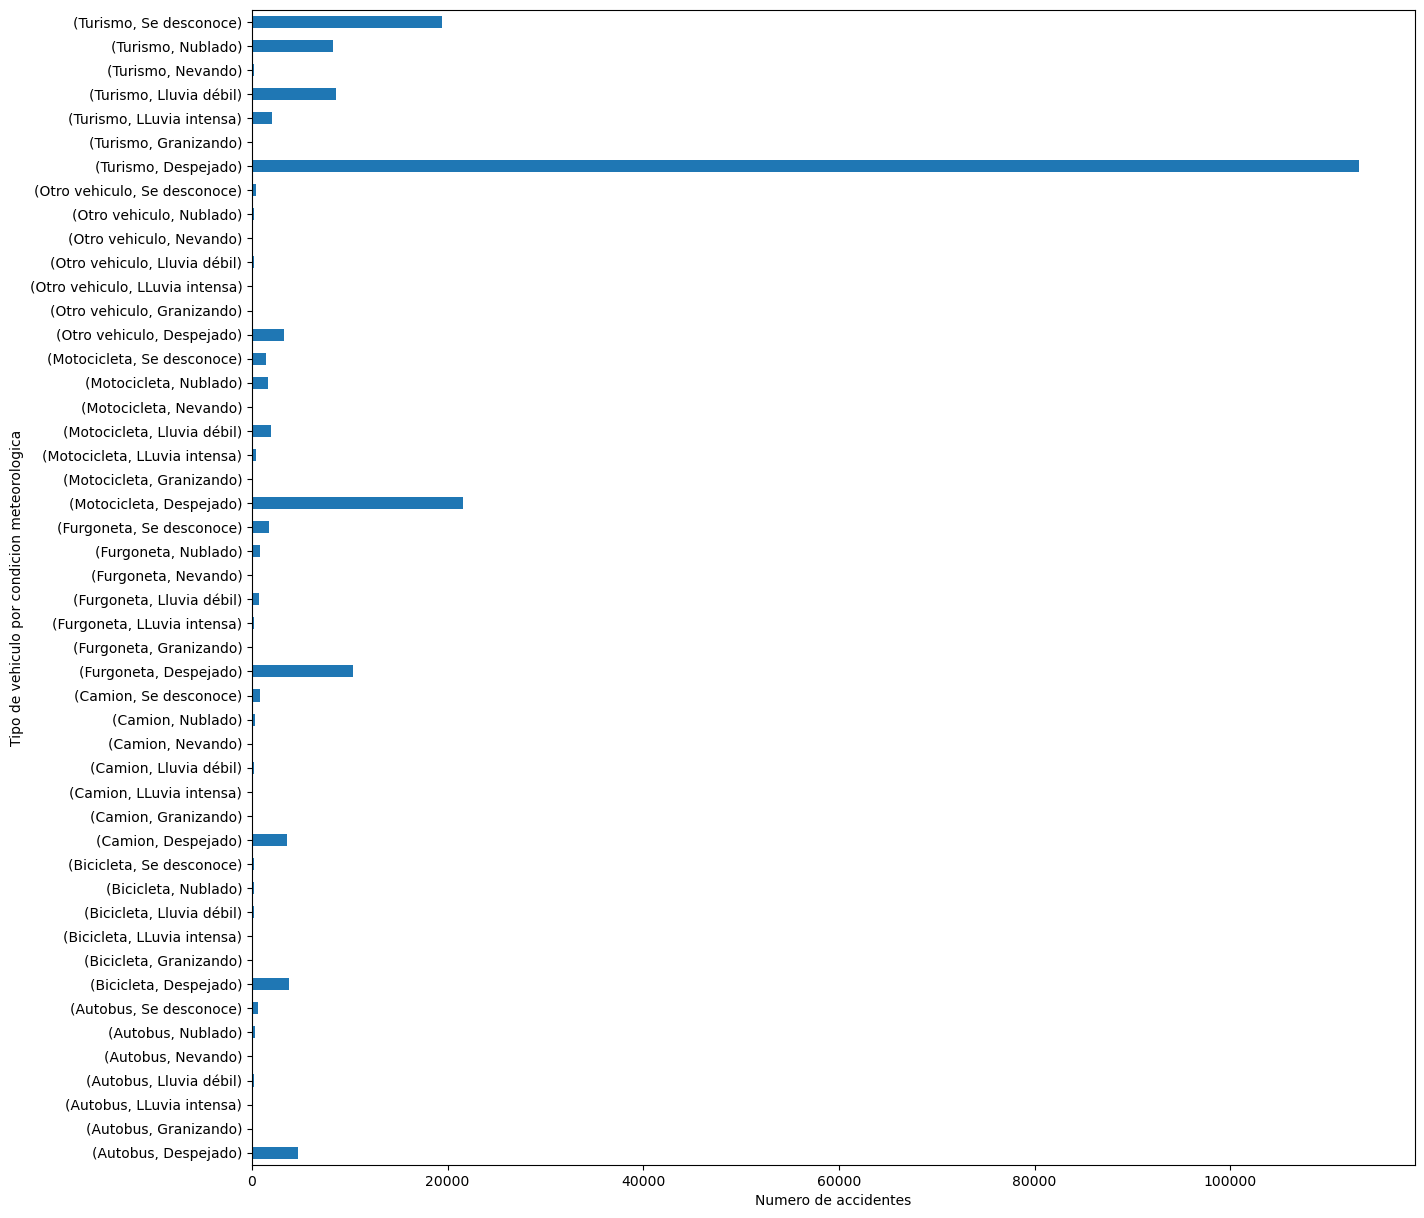


[--------------------[Apartado 9]--------------------]

Hay 3396 numeros de expediente.
Nº de expediente 2019S000066:
	 - Ha sido implicado 7 veces
	 - Vehiculos implicados: Autobus, Motocicleta
Nº de expediente 2019S007442:
	 - Ha sido implicado 9 veces
	 - Vehiculos implicados: Autobus, Motocicleta
Nº de expediente 2019S008207:
	 - Ha sido implicado 8 veces
	 - Vehiculos implicados: Autobus, Turismo
Nº de expediente 2019S008725:
	 - Ha sido implicado 5 veces
	 - Vehiculos implicados: Autobus
Nº de expediente 2019S010427:
	 - Ha sido implicado 8 veces
	 - Vehiculos implicados: Autobus
Nº de expediente 2019S012309:
	 - Ha sido implicado 8 veces
	 - Vehiculos implicados: Autobus, Motocicleta, Turismo
Nº de expediente 2019S013305:
	 - Ha sido implicado 9 veces
	 - Vehiculos implicados: Autobus, Turismo
Nº de expediente 2019S014153:
	 - Ha sido implicado 9 veces
	 - Vehiculos implicados: Autobus, Bicicleta
Nº de expediente 2019S014409:
	 - Ha sido implicado 6 veces
	 - Vehiculos implicad

C:\Users\sergi\AppData\Local\Temp\ipykernel_5004\4152611886.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accidentRecord_2019_2023['hora'] = pd.to_datetime(accidentRecord_2019_2023['hora'])


In [14]:
anios = [2019, 2020, 2021, 2022, 2023]
if __name__ == '__main__':
   print('\n[--------------------[Apartado 1]--------------------]\n')
   accidentRecord = parseCsvToDataFramewithPattern(anios)
   print('\n[--------------------[Apartado 2]--------------------]\n')   
   accidentRecordWithoutCoordinates = removeCoordinateColumns(accidentRecord) 
   print('\n[--------------------[Apartado 3]--------------------]\n')
   restructuringOfTheAccidentRecord = categoryRestructuring(accidentRecordWithoutCoordinates)
   saveCSV(restructuringOfTheAccidentRecord)
   print('\n[--------------------[Apartado 4]--------------------]\n')
   accidentRecord_2019_2023 = parseCsvToDataFrame('2019_2023_Accidentalidad')
   accidentRecord_2019_2023 = nullCheck(accidentRecord_2019_2023)
   print('\n[--------------------[Apartado 5]--------------------]\n')
   accidentRecord_2019_2023 = restructuringByPercentage(accidentRecord_2019_2023)
   print('\n[--------------------[Apartado 6]--------------------]\n')
   positiveForDrugsAndAlcohol(accidentRecord_2019_2023)
   print('\n[--------------------[Apartado 7]--------------------]\n')
   differentiationBetweenPositiveAndNegative(accidentRecord_2019_2023)
   print('\n[--------------------[Apartado 8]--------------------]\n')
   visualizationOfAccidentsByVehicleAndWeather(accidentRecord_2019_2023)
   print('\n[--------------------[Apartado 9]--------------------]\n')
   groupingByFileNumber(accidentRecord_2019_2023)
   print('\n[--------------------[Apartado 10]--------------------]\n')
   dangerousHour(accidentRecord_2019_2023)



